In [10]:
! pip install catboost

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


warnings.filterwarnings('ignore')

### **Leitura do dataset**

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Estudos Manu + Rodriguinho/2° ano/Machine Learning/Abril/08.04/CarPrice_Assignment(1).csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
for col in df.select_dtypes(include='object').columns:
  df[col] = LabelEncoder().fit_transform(df[col])

### **Divisão Treino e Teste**

In [14]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Exercícios**

#### *1 - Aplique o RandomizedSearchCV com o XGBRegressor neste dataset.*

In [15]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.0001],
    'max_depth': [3,4,5,6,7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]
}

random_search_xgb = RandomizedSearchCV(XGBRegressor(random_state=42),
                                       param_distributions=params,
                                       n_iter=10,
                                       cv=3,
                                       n_jobs=-1,
                                       verbose=1,
                                       scoring='r2')
random_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.0001],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
                   scoring='r2', verbose=1)

In [16]:
print("Melhores Hiperparametros: ", random_search_xgb.best_params_)
best_model_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred_xgb)
print("R2 Score no XGBoost com Random Search: ", r2)

Melhores Hiperparametros:  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
R2 Score no XGBoost com Random Search:  0.922377067317715


#### *2 - Compare o desempenho de GridSearchCV com RandomizedSearchCV usando LGBMRegressor.*

In [17]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.0001],
    'max_depth': [3,4,5,6,7]
}

random_search_lgbm = RandomizedSearchCV(LGBMRegressor(random_state=42),
                                       param_distributions=params,
                                       cv=3,
                                       n_jobs=-1,
                                       scoring='r2')
random_search_lgbm.fit(X_train, y_train)
print("Melhores Hiperparametros LGBM com Random Search: ", random_search_lgbm.best_params_)
best_model_lgbm = random_search_lgbm.best_estimator_
y_pred_lgbm = best_model_lgbm.predict(X_test)
r2 = r2_score(y_test, y_pred_lgbm)
print("R2 Score do LGBM com Random Search: ", r2)


params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.0001],
    'max_depth': [3,4,5,6,7]
}

grid_search_lgbm = GridSearchCV(LGBMRegressor(random_state=42),
                                       param_grid=params,
                                       cv=3,
                                       n_jobs=-1,
                                       scoring='r2')
grid_search_lgbm.fit(X_train, y_train)
print("Melhores Hiperparametros LGBM com Grid Search: ", grid_search_lgbm.best_params_)
grid_model_lgbm = grid_search_lgbm.best_estimator_
y_pred_lgbm = grid_model_lgbm.predict(X_test)
r2 = r2_score(y_test, y_pred_lgbm)
print("R2 Score do LGBM com Grid Search: ", r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 23
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

#### **3 - Aplique CatBoostRegressor e ajuste depth e learning_rate via tuning.**

In [18]:
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.0001],
    'depth': [3,4,5,6,7]
}

grid_search_catboost = GridSearchCV(CatBoostRegressor(verbose=0, random_state=42),
                                       param_grid=params,
                                       cv=3,
                                       n_jobs=-1,
                                       scoring='r2')
grid_search_catboost.fit(X_train, y_train)
print("Tuning de Hiperparametros de CatBoost com Grid Search: ", grid_search_catboost.best_params_)
grid_model_catb = grid_search_catboost.best_estimator_
y_pred_catb = grid_model_catb.predict(X_test)
r2 = r2_score(y_test, y_pred_catb)
print("R2 Score do Catboost com Grid Search: ", r2)

Tuning de Hiperparametros de CatBoost com Grid Search:  {'depth': 4, 'learning_rate': 0.05}
R2 Score do Catboost com Grid Search:  0.948635737991968


#### *4 - Use validação cruzada cross_val_score para avaliar modelos ajustados.*

In [19]:
def evaluate_model(model, name):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
    print(f"R2 Score de {name}: {scores.mean()}")

In [20]:
evaluate_model(best_model_xgb, 'XGBoost + Random Search')
evaluate_model(best_model_lgbm, 'LGBM + Random Search')
evaluate_model(grid_model_catb, 'CatBoost + Grid Search')
evaluate_model(grid_model_lgbm, 'LGBM + Grid Search')

R2 Score de XGBoost + Random Search: 0.9110904115764541
R2 Score de LGBM + Random Search: 0.8765298693401764
R2 Score de CatBoost + Grid Search: 0.9160305737519197
R2 Score de LGBM + Grid Search: 0.8764614870937892


#### *5 - Crie um pipeline com StandardScaler e GradientBoostingRegressor + GridSearchCV.*

In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Passo 1 : Padronização dos dados
    ('gbr', GradientBoostingRegressor(random_state=42)) # Passo 2: Modelo Gradient Boosting
])
param_grid_gbr_pipeline = {
    'gbr__n_estimators': [100, 200],
    'gbr__learning_rate': [0.01, 0.1],
    'gbr__max_depth': [3, 5]
}
grid_search_gbr_pipeline = GridSearchCV(pipeline,
                                       param_grid=param_grid_gbr_pipeline,
                                       cv=3,
                                       scoring='r2',
                                       n_jobs=-1)
grid_search_gbr_pipeline.fit(X_train, y_train)
print("Melhores hiperparâmetros (GBR Pipeline):", grid_search_gbr_pipeline.best_params_)
best_model_gbr_pipeline = grid_search_gbr_pipeline.best_estimator_
y_pred_gbr_pipeline = best_model_gbr_pipeline.predict(X_test)
rmse_gbr_pipeline = r2_score(y_test, y_pred_gbr_pipeline)
print(f"RMSE no conjunto de teste (GBR Pipeline): {rmse_gbr_pipeline}")

Melhores hiperparâmetros (GBR Pipeline): {'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__n_estimators': 200}
RMSE no conjunto de teste (GBR Pipeline): 0.9311983276080829


#### *6 - Ajuste hiperparâmetros do AdaBoostRegressor e compare o desempenho com Gradient Boosting.*

In [22]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.0001]
}

grid_search_adaboost = GridSearchCV(AdaBoostRegressor(random_state=42),
                                       param_grid=params,
                                       cv=3,
                                       n_jobs=-1,
                                       scoring='r2')
grid_search_adaboost.fit(X_train, y_train)
print("Melhores Hiperparametros LGBM com Grid Search: ", grid_search_adaboost.best_params_)
grid_model_adaboost = grid_search_adaboost.best_estimator_
y_pred_lgbm = grid_model_adaboost.predict(X_test)
r2 = r2_score(y_test, y_pred_lgbm)
print("R2 Score do Adaboost com Grid Search: ", r2)

Melhores Hiperparametros LGBM com Grid Search:  {'learning_rate': 0.3, 'n_estimators': 200}
R2 Score do Adaboost com Grid Search:  0.9149298609133503


In [23]:
evaluate_model(grid_model_adaboost, 'Adaboost + Grid Search')
evaluate_model(best_model_gbr_pipeline, 'GBR Pipeline + Grid Search')

R2 Score de Adaboost + Grid Search: 0.8848314775305068
R2 Score de GBR Pipeline + Grid Search: 0.9019017627588493


#### *7 - Use a métrica mean_absolute_error em vez de RMSE no tuning com LightGBM.*

In [24]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.0001],
    'max_depth': [3,4,5,6,7]
}

grid_search_lgbm = GridSearchCV(LGBMRegressor(random_state=42),
                                       param_grid=params,
                                       cv=3,
                                       n_jobs=-1,
                                       scoring='neg_mean_absolute_error')
grid_search_lgbm.fit(X_train, y_train)
print("Melhores Hiperparametros LGBM com Grid Search: ", grid_search_lgbm.best_params_)
grid_model_lgbm = grid_search_lgbm.best_estimator_
y_pred_lgbm = grid_model_lgbm.predict(X_test)
r2 = mean_absolute_error(y_test, y_pred_lgbm)
print("MAE Score do LGBM com Grid Search: ", r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 23
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

#### *8 - Visualize os resultados do GridSearchCV com pandas DataFrame.*

In [25]:
df_grid_search = pd.DataFrame(grid_search_lgbm.cv_results_)

In [26]:
df_grid_search.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030301,0.004360,0.008443,0.004937,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-2875.785959,-3061.163631,-4327.128121,-3421.359237,644.931094,125
1,0.085627,0.021685,0.007671,0.001043,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-2292.188720,-2381.076395,-3812.707822,-2828.657646,696.774146,120
2,0.108351,0.014787,0.008434,0.002529,0.01,3,300,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-2139.785531,-2178.668652,-3587.278698,-2635.244294,673.377113,115
3,0.133678,0.021853,0.009160,0.002257,0.01,3,400,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-2090.819206,-2097.244921,-3501.704637,-2563.256255,663.588400,110
4,0.170581,0.044276,0.007701,0.003178,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-2046.990384,-2036.222927,-3431.924577,-2505.045963,655.416895,105


#### *9 - Tente encontrar o menor learning_rate que ainda mantém a performance do XGBoost.*

In [27]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.0001]
results_lr = {}

for lr in learning_rates:
    xgb_model = XGBRegressor(learning_rate=lr, random_state=42, n_estimators=200)
    scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    results_lr[lr] = np.sqrt(-scores.mean())

best_lr = min(results_lr, key=results_lr.get)
print(f"RMSE médio para diferentes learning rates (XGBoost): {results_lr}")
print(f"Menor Learning Rate com boa performance no XGBoost: {best_lr}")

RMSE médio para diferentes learning rates (XGBoost): {0.01: np.float64(2862.745789994855), 0.05: np.float64(2443.8585441250675), 0.1: np.float64(2450.374795049395), 0.2: np.float64(2404.8897107535267), 0.3: np.float64(2639.692346949998), 0.0001: np.float64(7677.7966286399)}
Menor Learning Rate com boa performance no XGBoost: 0.2


#### *10 - Avalie o impacto de subsample em overfitting usando gráficos com resultados.*

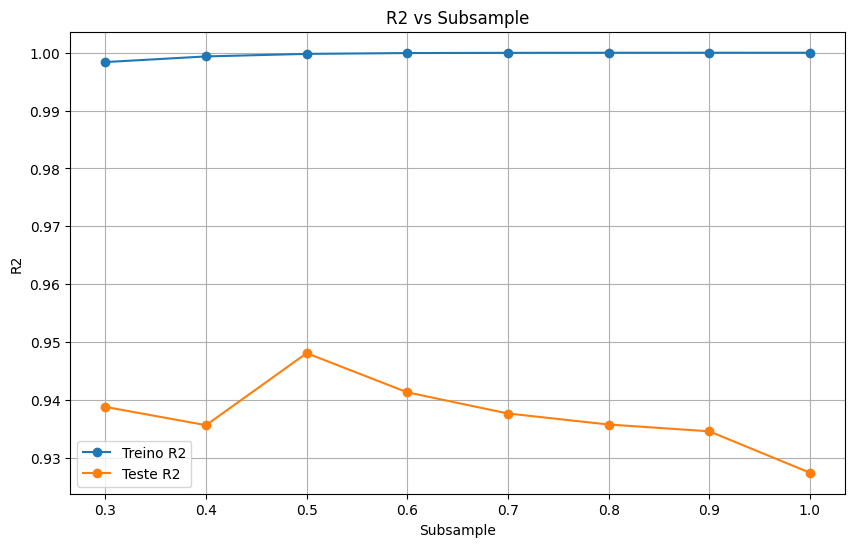

In [28]:
subsample = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_rmse = []
test_rmse = []

# Looping que testa cada um dos valores de subsample da lista subsample, treina o modelo, faz inferencia em treino e teste e salva nas listas
# train_rmse e test_rmse.
for ss in subsample:
    model = XGBRegressor(n_estimators=200, subsample=ss, learning_rate=0.1, gbr__max_depth=5, colsample_bytree=0.8, random_state=42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_rmse.append(r2_score(y_train, y_pred_train))
    test_rmse.append(r2_score(y_test, y_pred_test))

plt.figure(figsize=(10, 6))
plt.plot(subsample, train_rmse, label='Treino R2', marker='o')
plt.plot(subsample, test_rmse, label='Teste R2', marker='o')
plt.xlabel('Subsample')
plt.ylabel('R2')
plt.title('R2 vs Subsample')
plt.legend()
plt.grid(True)
plt.show()